In [3]:
#2.5 Tensor与Autograd
#2.5.3 标量反向传播
import torch
 
#定义输入张量x
x=torch.Tensor([2])
#初始化权重参数W,偏移量b、并设置require_grad属性为True，为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
#实现前向传播
y=torch.mul(w,x)  #等价于w*x
z=torch.add(y,b)  #等价于y+b
#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


In [4]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
#因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))
#y，z的是否为叶子节点：,

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x7fdfbe3fcf10>,<AddBackward0 object at 0x7fdfbe3b5c50>


In [5]:
#基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
z.backward()
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
#z.backward(retain_graph=True)
 
#查看叶子节点的梯度，x是叶子节点但它无需求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
#参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
 
#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
#非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  # This is added back by InteractiveShellApp.init_path()


In [6]:
#2.5.4 非标量反向传播
import torch
 
#定义叶子节点张量x，形状为1x2
x= torch.tensor([[2, 3]], dtype=torch.float, requires_grad=True)
#初始化Jacobian矩阵
J= torch.zeros(2 ,2)
#初始化目标张量，形状为1x2
y = torch.zeros(1, 2)
#定义y与x之间的映射关系：
#y1=x1**2+3*x2，y2=x2**2+2*x1
y[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
y[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]

In [7]:
y.backward(torch.Tensor([[1, 1]]))
print(x.grad)
#结果为tensor([[6., 9.]])

tensor([[6., 9.]])


In [8]:
#生成y1对x的梯度
y.backward(torch.Tensor([[1, 0]]),retain_graph=True)
J[0]=x.grad
#梯度是累加的，故需要对x的梯度清零
x.grad = torch.zeros_like(x.grad)
#生成y2对x的梯度
y.backward(torch.Tensor([[0, 1]]))
J[1]=x.grad
#显示jacobian矩阵的值
print(J)

RuntimeError: ignored

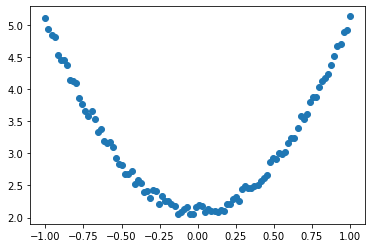

In [10]:
#2.6 使用Numpy实现机器学习
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

np.random.seed(100)
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)   

plt.scatter(x, y)
plt.show()

In [11]:
# 随机初始化参数
w1 = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)

In [12]:
lr = 0.001

for i in range(800):
  y_pred = np.power(x, 2) * w1 + b1
  loss = 0.5 * (y_pred - y) ** 2
  loss = loss.sum()
  grad_w = np.sum((y_pred - y) * np.power(x, 2))
  grad_b = np.sum((y_pred - y))
  w1 -= lr * grad_w
  b1 -= lr * grad_b

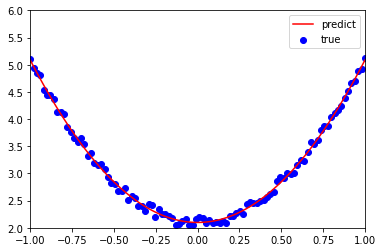

[[2.98927619]] [[2.09818307]]


In [13]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)

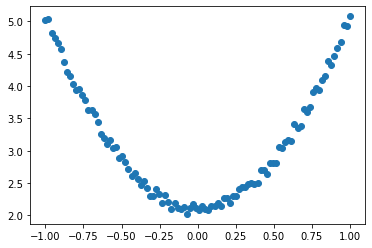

In [14]:
#2.7 使用Tensor及antograd实现机器学习
#2.6节可以说是纯手工完成一个机器学习任务，数据用Numpy表示，梯度及学习是自己定义并构建学习模型。
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

t.manual_seed(100) 
dtype = t.float
#生成x坐标数据，x为tenor，需要把x的形状转换为100x1
x = t.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*torch.rand(x.size())                 
 
# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [15]:
# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True)

lr =0.001 # 学习率
 
for ii in range(800):
    # 前向传播，并定义损失函数loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 自动计算梯度，梯度存放在grad属性中
    loss.backward()
    
    # 手动更新参数，需要用torch.no_grad()，使上下文环境中切断自动求导的计算
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

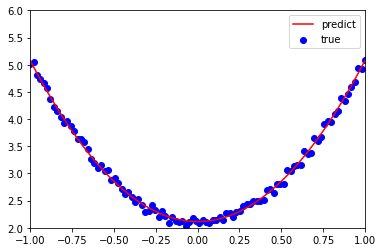

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [16]:
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()  
print(w, b)